# Building a Movie Content Based Recommendation Systems

In [28]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
credits=pd.read_csv('G:/Movie rec/tmdbcr.csv')
movies=pd.read_csv('G:/Movie rec/tmdbmr.csv')

In [3]:
credits.shape, movies.shape

((4803, 4), (4803, 20))

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
#we renamed movie_id with id since id and movie id's are same
#also we can merge
credits.columns =['id', 'title', 'cast', 'crew']

In [7]:
movies_df=movies.merge(credits, on='id')

In [8]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies_df['original_title'].describe()

count                4803
unique               4801
top       Out of the Blue
freq                    2
Name: original_title, dtype: object

In [23]:
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
tagline                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [12]:
movies_df.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'], axis=1, inplace=True)

In [13]:
movies_df.shape

(4803, 18)

# Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. 
So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [18]:
movies_df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [19]:
movies_df['overview'] = movies_df['overview'].fillna('')

In [26]:
movies_df.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [29]:
pop=movies_df.sort_values('popularity',ascending=False)

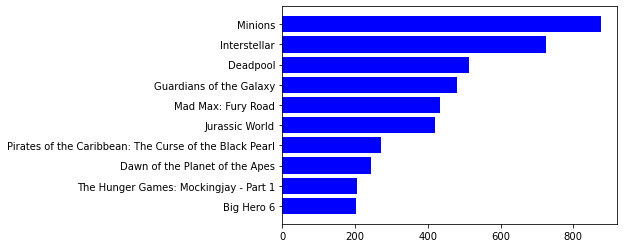

In [40]:
plt.barh(pop['original_title'].head(10),pop['popularity'].head(10), align='center',
        color='b')
plt.gca().invert_yaxis()

In [42]:
pop1=movies_df.sort_values('budget',ascending=False)

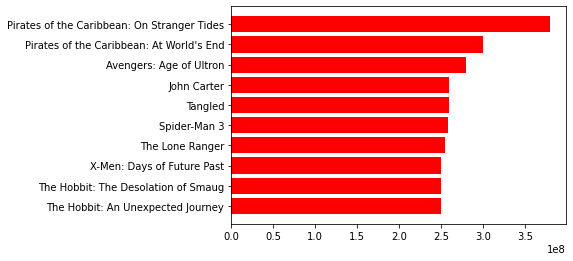

In [46]:
plt.barh(pop1['original_title'].head(10),pop1['budget'].head(10), align='center',
        color='r')
plt.gca().invert_yaxis()

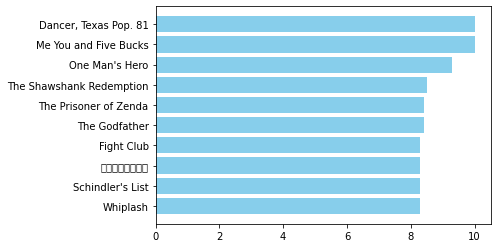

In [48]:
pop2=movies_df.sort_values('vote_average',ascending=False)
plt.barh(pop2['original_title'].head(10),pop2['vote_average'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()

In [25]:
movies_df.shape

(3959, 18)

In [21]:
movies_df.dropna(inplace=True)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')


In [55]:
tfv

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

In [60]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_df['overview']).toarray()

In [65]:
tfv_matrix.shape

(3959, 8872)

In [71]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [72]:
sig[0]

array([0.76164149, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the sigmoid kernel
cos = cosine_similarity(tfv_matrix)

In [76]:
cos[1255]

array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.0041724])

In [77]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['original_title']).drop_duplicates()

In [79]:
movies_df['original_title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4795                                        Bang
4796                                      Primer
4798                                 El Mariachi
4799                                   Newlyweds
4801                            Shanghai Calling
Name: original_title, Length: 3959, dtype: object

In [81]:
indices.shape

(3959,)

In [88]:
indices['John Carter']

4

In [89]:
sig[4]

array([0.76159416, 0.76159601, 0.76159447, ..., 0.76159416, 0.76159466,
       0.76159416])

In [90]:
cos[4]

array([0.        , 0.03926408, 0.00665169, ..., 0.        , 0.01057967,
       0.        ])

In [103]:
'''list(enumerate(sig[indices['Avatar']]))'''

"list(enumerate(sig[indices['Avatar']]))"

In [102]:
'''sorted(list(enumerate(sig[indices['Avatar']])), key=lambda x: x[1], reverse=True)'''

"sorted(list(enumerate(sig[indices['Avatar']])), key=lambda x: x[1], reverse=True)"

In [101]:
'''list(enumerate(cos[indices['Avatar']]))'''

"list(enumerate(cos[indices['Avatar']]))"

In [100]:
'''sorted(list(enumerate(cos[indices['Avatar']])), key=lambda x: x[1], reverse=True)'''

"sorted(list(enumerate(cos[indices['Avatar']])), key=lambda x: x[1], reverse=True)"

In [92]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df['original_title'].iloc[movie_indices]

In [93]:
give_rec('John Carter')

1254                          Get Carter
2932                        Raising Cain
1307                       The Hurricane
3349                           Desperado
345                          Rush Hour 2
3068                         Rescue Dawn
91          Independence Day: Resurgence
4274    Eddie: The Sleepwalking Cannibal
581              Star Trek: Insurrection
1300                      The Ugly Truth
Name: original_title, dtype: object

In [94]:
give_rec('Avatar')

634                          The Matrix
3604                          Apollo 18
775                           Supernova
529                    Tears of the Sun
151                             Beowulf
311        The Adventures of Pluto Nash
847                            Semi-Pro
1784                          EverAfter
570                              Ransom
36      Transformers: Age of Extinction
Name: original_title, dtype: object

In [96]:
def give_rec1(title, cos=cos):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(cos[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df['original_title'].iloc[movie_indices]

In [97]:
give_rec1('Avatar')

634                          The Matrix
3604                          Apollo 18
775                           Supernova
529                    Tears of the Sun
151                             Beowulf
311        The Adventures of Pluto Nash
847                            Semi-Pro
1784                          EverAfter
570                              Ransom
36      Transformers: Age of Extinction
Name: original_title, dtype: object

# Netflix movie recommendation
Average Weighted Recommendation Engines using Python.ipynb

Using Weighted average for each movie's Average Rating

In [104]:
movies_df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


W=(RV+CM)/V+M

W=Weighted rating
R=avaerage of the movie 0-10 mean =rating
V=number of votes of the movie
C=mean vote accross the whole data
M=minimum votes requuired to be in top 250(currently 30000)

In [105]:
# Calculate all the components based on the above formula
v=movies_df['vote_count']
R=movies_df['vote_average']
C=movies_df['vote_average'].mean()
m=movies_df['vote_count'].quantile(0.70)

In [106]:
movies_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [107]:
movie_sorted_ranking=movies_df.sort_values('weighted_average',ascending=False)

In [110]:
movie_sorted_ranking.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.312997
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",8.158505
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8.149501
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Just because you are a character doesn't mean ...,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8.133297
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",8.085788


In [109]:
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.312997,136.747729
3337,The Godfather,5893,8.4,8.158505,143.659698
662,Fight Club,9413,8.3,8.149501,146.757391
3232,Pulp Fiction,8428,8.3,8.133297,121.463076
65,The Dark Knight,12002,8.2,8.085788,187.322927
809,Forrest Gump,7927,8.2,8.031964,138.133331
96,Inception,13752,8.1,8.004574,167.583710
1818,Schindler's List,4329,8.3,7.997959,104.469351
3865,Whiplash,4254,8.3,7.993405,192.528841
95,Interstellar,10867,8.1,7.980814,724.247784


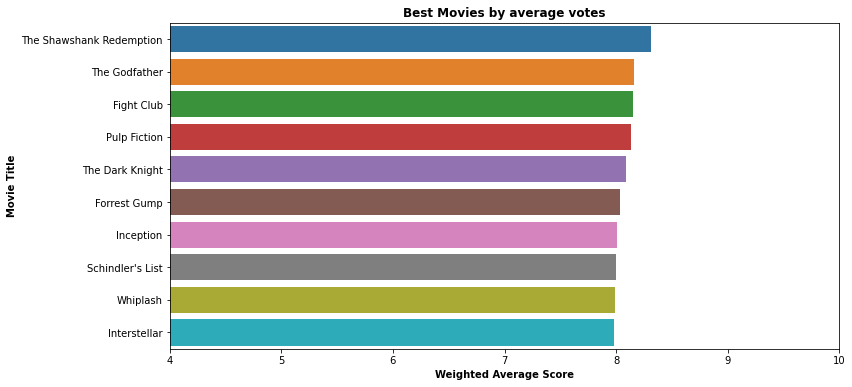

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

# Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.663837,0.171814
1,0.566135,0.158846
2,0.417687,0.122634
3,0.765597,0.128272
4,0.370954,0.050169


In [114]:
movies_df[['normalized_weight_average','normalized_popularity']]=movie_normalized_df

In [115]:
movie_normalized_df

,weighted_average,popularity
0,0.663837,0.171814
1,0.566135,0.158846
2,0.417687,0.122634
3,0.765597,0.128272
4,0.370954,0.050169
...,...,...
3954,0.388442,0.001048
3955,0.486899,0.026620
3956,0.418316,0.016297
3957,0.387956,0.000733


In [117]:
movies_df['score'] = movies_df['normalized_weight_average'] * 0.5 + movies_df['normalized_popularity'] * 0.5
movies_scored_df = movies_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
91,Independence Day: Resurgence,0.904683,0.827162,0.865923
531,The Man from U.N.C.L.E.,0.442570,1.000000,0.721285
90,The Polar Express,0.847567,0.549462,0.698515
765,Almost Famous,0.716544,0.587689,0.652116
1770,Money Monster,1.000000,0.156179,0.578090
123,The Matrix Revolutions,0.659908,0.495989,0.577948
63,"The Chronicles of Narnia: The Lion, the Witch ...",0.934805,0.213941,0.574373
3375,Redbelt,0.908296,0.219887,0.564091
644,Cliffhanger,0.953087,0.167611,0.560349
92,How to Train Your Dragon,0.911501,0.191397,0.551449


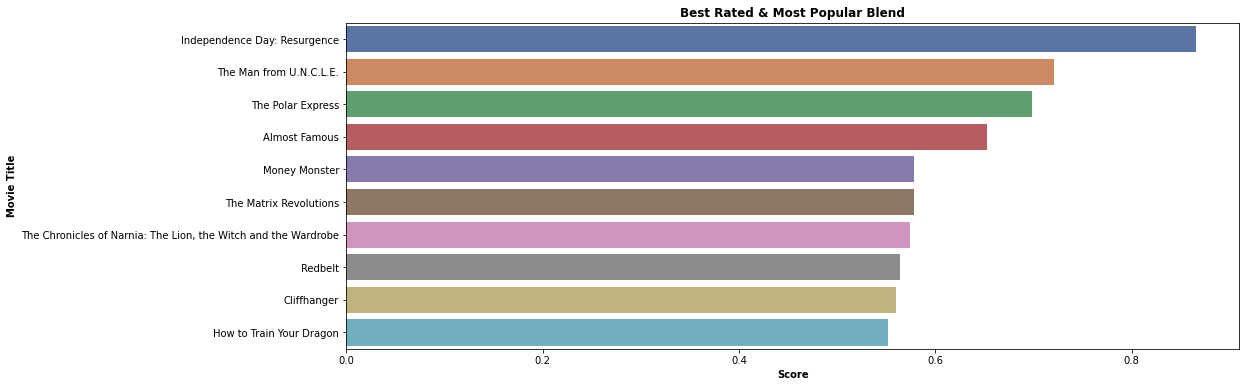

In [118]:
scored_df = movies_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')